In [57]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [58]:
!kaggle datasets download -d singhan4/singhan-rice-50

singhan-rice-50.zip: Skipping, found more recently modified local copy (use --force to force download)


In [59]:
import zipfile
zip_ref = zipfile.ZipFile('/content/singhan-rice-50.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [62]:
import tensorflow as tf
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

GPU is available


In [63]:

from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("/content/drive/MyDrive/rice3_disease_detection_model.h5")

In [64]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/Rice_50/Validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = test_set.class_names

Found 272 files belonging to 3 classes.


In [65]:
y_pred = loaded_model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

272/272 [==============================] - 1s 4ms/step


In [66]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

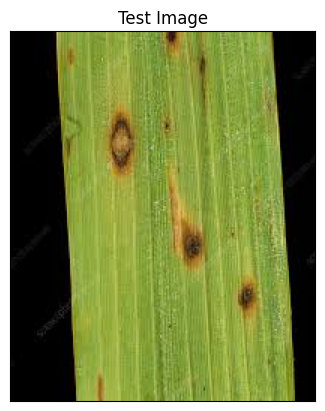

In [71]:
import cv2
image_path = '/content/bs(5).jpeg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [72]:
import numpy as np
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = loaded_model.predict(input_arr)

1/1 [==============================] - 0s 20ms/step


In [73]:
result_index = np.argmax(predictions) #Return index of max element


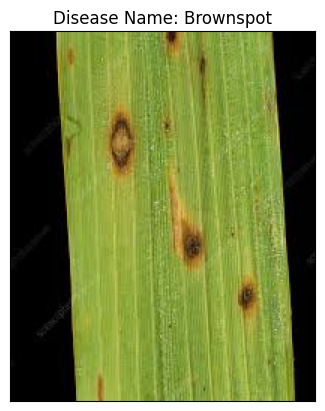

In [74]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()